In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# read data in
# confirmed.csv contains infection rates time series
confirmed = pd.read_csv('confirmed.csv', header='infer')
# unified.csv contains regional population information
unified = pd.read_csv('unified.csv', header='infer')

# extract the total population N for a county
N_Pima = int(unified[unified['Admin2'] == 'Pima']['Population'])
#print(N_Pima)

In [3]:
# extracting Arizona data
arizona = confirmed[confirmed['Province_State']=='Arizona']
arizona

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,5036,5112,5217,5309,5347,5391,5392,5492,5548,5630
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,3272,3350,3434,3529,3596,3639,3639,3781,3863,3954
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,7114,7185,7229,7275,7446,7474,7520,7575,7644,7744
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,2689,2847,2881,2897,2913,2970,3003,3076,3117,3167
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,2008,2041,2117,2132,2158,2194,2215,2242,2256,2281
106,84004011,US,USA,840,4011.0,Greenlee,Arizona,US,33.214988,-109.240528,...,187,194,208,215,218,224,228,239,248,265
107,84004012,US,USA,840,4012.0,La Paz,Arizona,US,33.728542,-113.981003,...,755,789,788,825,828,867,867,883,902,921
108,84004013,US,USA,840,4013.0,Maricopa,Arizona,US,33.348359,-112.491815,...,194410,196849,198822,201340,203663,205332,205658,213121,215386,218935
109,84004015,US,USA,840,4015.0,Mohave,Arizona,US,35.704717,-113.757790,...,5808,5853,5968,6079,6156,6197,6199,6477,6608,6792
110,84004017,US,USA,840,4017.0,Navajo,Arizona,US,35.399771,-110.321898,...,7756,7815,7884,7976,8035,8118,8163,8283,8323,8423


In [4]:
# extracting Pima data
pima = arizona[arizona['Admin2']=='Pima']
maricopa = arizona[arizona['Admin2']=='Maricopa']
# extract time series portion
timeseries = list(pima)[11:]
I_pima = pima[timeseries].values[0]
I_mari = maricopa[timeseries].values[0]

T = len(I_pima)
I_pima

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     1,     1,     1,     2,     2,
           4,     4,     5,     7,     8,    12,    17,    24,    42,
          49,    75,   102,   120,   153,   187,   202,   217,   237,
         280,   326,   372,   415,   415,   464,   512,   543,   591,
         622,   668,   685,   700,   760,   819,   856,   913,   941,
         963,   973,  1026,  1060,  1090,  1136,  1164,  1188,  1215,
        1241,  1267,  1300,  1326,  1346,  1379,  1425,  1465,  1520,
        1554,  1585,  1602,  1623,  1661,  1696,  1750,  1781,  1814,
        1825,  1888,  1903,  1944,  1974,  2002,  2027,  2046,  2075,
        2119,  2167,

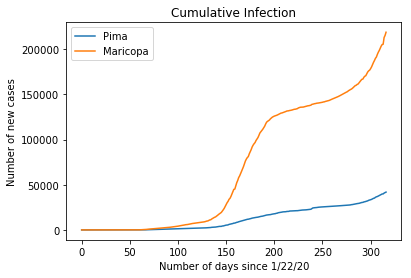

In [5]:
plt.plot(range(T), I_pima, label='Pima' )
plt.plot(range(T), I_mari, label='Maricopa')

plt.title('Cumulative Infection')
plt.ylabel('Number of new cases')
plt.xlabel('Number of days since '+timeseries[0])
plt.legend()
plt.show()

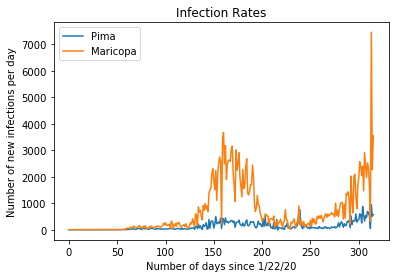

In [6]:
# Take pair-wise difference to see infection rate curve
dI_pima = np.array([I_pima[i+1]-I_pima[i] for i in range(T-1)])
dI_mari = [I_mari[i+1]-I_mari[i] for i in range(T-1)]
plt.plot(range(T-1), dI_pima, label='Pima')
plt.plot(range(T-1), dI_mari, label='Maricopa')
plt.title('Infection Rates')
plt.xlabel('Number of days since '+timeseries[0])
plt.ylabel('Number of new infections per day')
plt.legend()
plt.show()

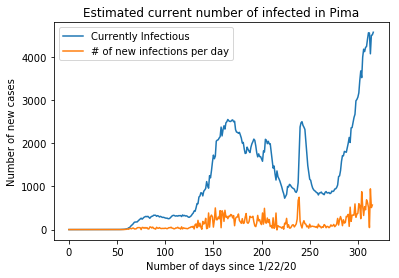

In [10]:
shape_D, scale_D = 18.8, 0.45  #mean, coefficient of variation for gamma probability dist. of time to death
shape_R, scale_R = 24.7, 0.35  #mean, coefficient of variation for gamma probability dist. of time to recovery

rate_D = 0.01
rate_R = 1-rate_D #assume 99% recovery rate

I = I_pima.copy()
dI = dI_pima.copy()
I_c = I.copy()
R = I.copy()

for i in range(len(R)):
    R[i] = 0

#print(R)

I[217] = 20919 + 8 #something wrong with this data point. should be a greater value than I[216]
dI[216] = 8 #edited to reflected the above change in I
#print(dI[216])
#print([I[216], I[217], I[218]])
#print(T)

#print(dI)

for i in range(T-1):
    num_R = int(round(rate_R * dI[i],0))
    num_D = int(round(rate_D * dI[i],0))
    
    #print([i, dI[i], num_R])
    
    #print(dI[i])
    #print(I_c[i])
    #print(R[i])
    
    time_D = np.random.gamma(shape_D, scale_D, num_D) #size parameter tells # of values it will give
    time_R = np.random.gamma(shape_R, scale_R, num_R)
    
    #print(time_D)
    #print(time_R)
    
    for j in range(0, len(time_D)-1):
        death_time = i + int(round(time_D[j]))
        if death_time <= T-1:
            #I_c[i + int(round(time_D[j]))] = I_c[i + int(round(time_D[j])) - 1] + dI[i + int(round(time_D[j]))] - 1
            R[death_time] += 1
            
    for k in range(0, len(time_R)-1):
        recovery_time = i + int(round(time_R[k]))
        if recovery_time <= T-1:
            #I_c[i + int(round(time_R[k]))] = I_c[i + int(round(time_R[k])) - 1] + dI[i + int(round(time_R[k]))] - 1
            R[recovery_time] += 1
        
for i in range(1,T):
    R[i] += R[i - 1]
    I_c[i] = I[i] - R[i]
    #print([I[i], I_c[i], R[i]])
    #print(I_c[i])
    #print(R[i])

# plt.plot(range(T), I, label='Cumulative Infected' )
plt.plot(range(T), I_c, label='Currently Infectious')
plt.plot(range(T-1), dI_pima, label='# of new infections per day')
# plt.plot(range(T), R, label='Recovered/Dead')

plt.title('Estimated current number of infected in Pima')
plt.ylabel('Number of new cases')
plt.xlabel('Number of days since '+timeseries[0])
plt.legend()
plt.savefig('currentnumberofinfected.png')

plt.show()





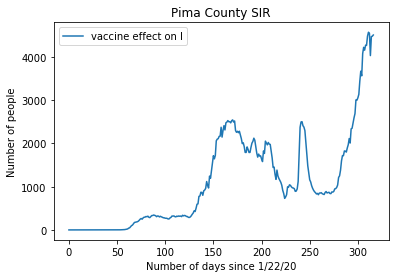

In [8]:
S = I.copy()
S[0] = N_Pima

for i in range(1, len(S)):
    S[i] = N_Pima - I_c[i] - R[i]
    
# plt.plot(range(T), S, label='Succeptable' )
# plt.plot(range(T), [N_Pima - I[i] for i in range(len(S))], label='unprocessed S')
# plt.plot(range(T), I_c, label='Currently Infectious')
# plt.plot(range(T), R, label='Removed')


alpha = .1
dayV = 100

dom = [1 if i>=dayV else 0 for i in range(T)]
S_v = np.array([S[i]*(1-alpha*dom[i]) for i in range(len(S)) ])
R_v = np.array([R[i]+S[i]*alpha*dom[i] for i in range(len(S))])

# plt.plot(range(T), S_v, label='vaccine effect on S')
# plt.plot(range(T), R_v, label='vaccine effect on R')

I_v = np.array([N_Pima - S_v[i] - R_v[i] for i in range(len(S))])
plt.plot(range(T), I_v, label='vaccine effect on I')
# plt.plot(range(T), [I_c[i] for i in range(len(S))], label='current infection count')


plt.title('Pima County SIR')
plt.ylabel('Number of people')
plt.xlabel('Number of days since '+timeseries[0])
plt.legend()
# plt.show()



In [9]:
#SIR model fitting
#Variables that we have: Susceptable, Infectious, Removed (S, I_c, R)

N = N_Pima
dI_c = [I_c[i+1]-I_c[i] for i in range(T-1)] #change in number of infectious people
dI_c.insert(0, 0)



#define objective function
def objective(X, beta, gamma):
    I_c[125:225], S[125:225] = X
    return beta*S[125:225]*I_c[125:225] - gamma*I_c[125:225]

#curve fit
popt, _ = curve_fit(objective, (I_c[125:225], S[125:225]), dI_c[125:225])
beta, gamma = popt

print(beta)
print(gamma)

Im = I_c[125:225].copy()
Sm = S[125:225].copy()
Rm = R[125:225].copy()

for i in range(len(R[125:225])):
    Im[i] = 0.0
    Sm[i] = 0.0
    Rm[i] = 0.0
    

#Im[0] = I_c[next((i for i, x in enumerate(I_c) if x), None)]# define this
Im[0] = I_c[125]
Sm[0] = N - Im[0]
Rm[0] = 0

beta = 0.00004
gamma = 5

#update I, S, R using calcualted beta and gamma
for i in range(1, len(Im)):
    Sm[i] = -beta*Sm[i-1]*Im[i-1] + Sm[i-1]
    Im[i] = beta*Sm[i-1]*Im[i-1] - gamma*Im[i-1] + Im[i-1]
    Rm[i] = gamma*Im[i-1] + Rm[i-1]

#print(Im)
#print(Sm)
#print(Rm)

plt.plot(range(100), Im, label='Currently Infectious Predicted')
plt.plot(range(100), I_c[125:225], label='Currently Infectious')

plt.title('Pima County SIR')
plt.ylabel('Number of people')
plt.xlabel('Number of days since '+timeseries[0])
plt.legend()
plt.show()


4.451820026472947e-06
4.6031540820079195


OverflowError: Python int too large to convert to C long

In [ ]:
# Suppose
I = I_pima
dI = dI_pima
# get first non-zero entry
I0 = I[next((i for i, x in enumerate(I) if x), None)]
alpha = 0
gamma = 0.9 # assumption
S = lambda t: float(N_Pima-I0)*np.prod([1-alpha-float(I[s])/N_Pima for s in range(t-1)])/N_Pima
S_pima = map(S, range(T))
# would like to find a way to write the following using map, or filter
dS_pima = [S_pima[i+1]-S_pima[i] for i in range(T-1)]


log_I_fun = lambda t: np.sum([np.log(1-gamma+S_pima[s]) for s in range(t-1)]) 
log_I = map(log_I_fun, range(T))
I_remade = map(lambda x: np.exp(x), log_I)



I_fun = lambda t: np.prod([1-gamma+S_pima[s] for s in range(t-1)])
I_recreated = map(I_fun, range(T))
I_recreated

# plt.plot(range(T), S_pima)
# plt.plot(range(T), 1-S_pima)
# plt.plot(range(T-1), dI)
plt.plot(range(T), I_recreated)
# plt.plot(range(T), 10000*I/N_Pima)
# plt.plot(range(T), I)

In [ ]:
I_recreated

In [ ]:
N_Pima-I0

In [ ]:
float(N_Pima-I0)/N_Pima

In [ ]:
1047278/1047279

In [ ]:
19/20

In [ ]:
maxIc = np.max(I_c)
norm_I_c = np.array([float(I_c[s])/maxIc for s in range(T-1)])
plt.plot(range(T-1),norm_I_c)
test = np.array([1-S[]]) 

In [ ]:
dom = [1 if i>=dayV else 0 for i in range(T) ]
# np.heaviside(,0) 
dom